
# 1. Project Header
m

In [1]:
# Title: Batch-wise Student Performance Analysis (AI_ELITE_4, AI_ELITE_6, AI_ELITE_7)
# Author: <Your Name>
# Date: <Date>
# Objective:
#   - Compare performance across three batches (AI_ELITE_4, 6, 7)
#   - Understand score distributions
#   - Derive insights and recommendations for teaching interventions


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8, 5)

# Load Data

In [3]:
file_path = "scores_data.csv"

raw_df = pd.read_csv(file_path)
print("Raw data shape:", raw_df.shape)
raw_df.head()

Raw data shape: (149, 3)


,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


# Data Inspection

In [5]:
print("Columns:", raw_df.columns.tolist())
print("\nInfo:")
print(raw_df.info())

print("\nSample rows:")
display(raw_df.head(10))

Columns: ['Batch ', 'User_ID ', '   Score   ']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB
None

Sample rows:


,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
5,AI_ELITE_7,uid_144,7 / 7
6,AI_ELITE_7,uid_143,5 / 7
7,AI_ELITE_7,uid_142,7 / 7
8,AI_ELITE_7,uid_141,3 / 7
9,AI_ELITE_7,uid_140,6 / 7


 # Data Cleaning

In [6]:
# 1) Strip extra spaces in column names
df = raw_df.copy()
df.columns = [c.strip() for c in df.columns]

# 2) Clean 'Score' column: values look like '6 / 7'
#    We only need the first number (0–7)
df["Score_raw"] = df["Score"].astype(str)

df["Score"] = (
    df["Score"]
    .astype(str)
    .str.split("/")
    .str[0]
    .str.strip()
    .astype(int)
)

print("Unique batches:", df["Batch"].unique())
print("Unique scores:", sorted(df["Score"].unique()))

df.head()

Unique batches: ['AI_ELITE_7' 'AI_ELITE_6' 'AI_ELITE_4']
Unique scores: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]


,Batch,User_ID,Score,Score_raw
0,AI_ELITE_7,uid_149,6,6 / 7
1,AI_ELITE_7,uid_148,6,6 / 7
2,AI_ELITE_7,uid_147,7,7 / 7
3,AI_ELITE_7,uid_146,7,7 / 7
4,AI_ELITE_7,uid_145,4,4 / 7


#  Basic Descriptive Statistic

In [7]:
overall_stats = df["Score"].describe()
print("Overall score stats:")
display(overall_stats)

batch_stats = (
    df.groupby("Batch")["Score"]
    .agg(["count", "mean", "median", "std", "min", "max"])
    .reset_index()
    .sort_values("mean", ascending=False)
)

print("\nBatch-wise statistics:")
display(batch_stats)

Overall score stats:


count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Score, dtype: float64


Batch-wise statistics:


,Batch,count,mean,median,std,min,max
2,AI_ELITE_7,53,5.056604,5.0,1.446682,2,7
1,AI_ELITE_6,48,4.229167,4.0,1.640441,0,7
0,AI_ELITE_4,48,3.791667,4.0,1.443376,0,7


#  Score Distribution by Batch (Counts)

In [8]:
score_dist = (
    df.groupby(["Batch", "Score"])
    .size()
    .unstack(fill_value=0)
    .sort_index(axis=1)
)

print("Score distribution (count of students per score per batch):")
display(score_dist)

Score distribution (count of students per score per batch):


Score,0,1,2,3,4,5,6,7
Batch,,,,,,,,
AI_ELITE_4,1,1,7,8,19,8,1,3
AI_ELITE_6,1,2,3,9,11,13,4,5
AI_ELITE_7,0,0,2,7,10,11,13,10


# Visualization – Histogram by Batch

C:\Users\Amrutha Reddy\AppData\Local\Temp\ipykernel_9348\1064217871.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Batch")


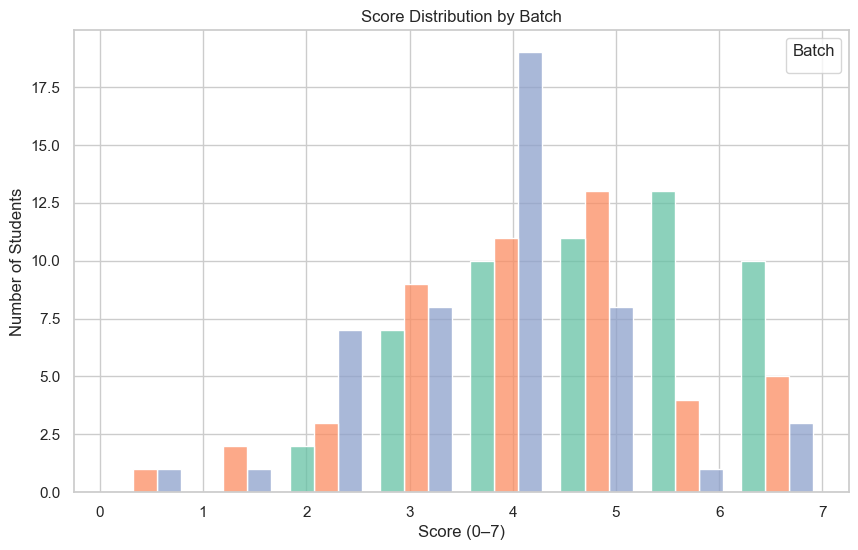

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Score", hue="Batch", multiple="dodge", bins=8, shrink=0.8)
plt.title("Score Distribution by Batch")
plt.xlabel("Score (0–7)")
plt.ylabel("Number of Students")
plt.legend(title="Batch")
plt.show()

# Visualization – Boxplot by Batch

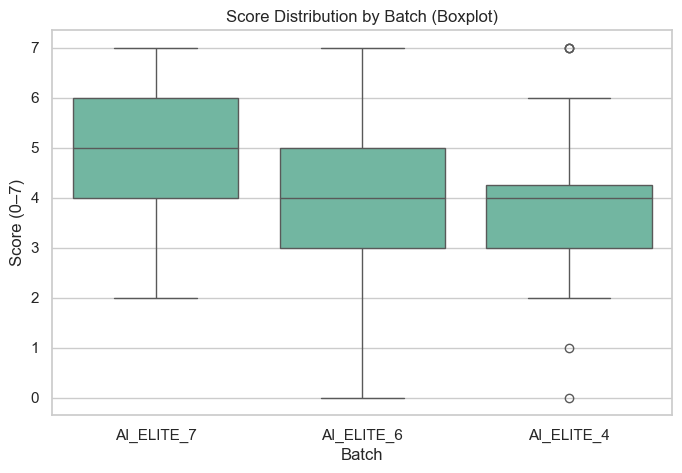

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Batch", y="Score")
plt.title("Score Distribution by Batch (Boxplot)")
plt.xlabel("Batch")
plt.ylabel("Score (0–7)")
plt.show()

# Visualization – Violin Plot by Batch

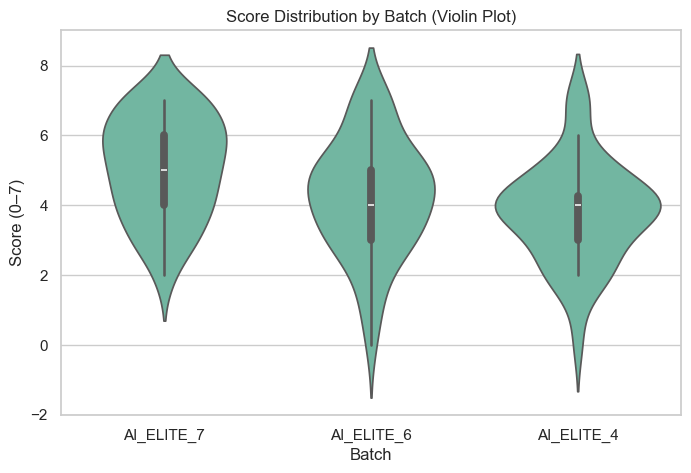

In [11]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="Batch", y="Score", inner="box")
plt.title("Score Distribution by Batch (Violin Plot)")
plt.xlabel("Batch")
plt.ylabel("Score (0–7)")
plt.show()

# Identify Top and Bottom Students per Batch

In [12]:
def get_top_bottom(df_in, batch_name, n=5):
    sub = df_in[df_in["Batch"] == batch_name].copy()
    top = sub.sort_values("Score", ascending=False).head(n)
    bottom = sub.sort_values("Score", ascending=True).head(n)
    return top, bottom

batches = df["Batch"].unique()

for b in batches:
    print(f"=== {b}: Top & Bottom Students ===")
    top_b, bottom_b = get_top_bottom(df, b, n=5)
    print("\nTop students:")
    display(top_b[["Batch", "User_ID", "Score"]])
    print("\nBottom students:")
    display(bottom_b[["Batch", "User_ID", "Score"]])
    print("-" * 50)

=== AI_ELITE_7: Top & Bottom Students ===

Top students:


,Batch,User_ID,Score
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
15,AI_ELITE_7,uid_134,7
7,AI_ELITE_7,uid_142,7
5,AI_ELITE_7,uid_144,7



Bottom students:


,Batch,User_ID,Score
50,AI_ELITE_7,uid_99,2
37,AI_ELITE_7,uid_112,2
11,AI_ELITE_7,uid_138,3
8,AI_ELITE_7,uid_141,3
32,AI_ELITE_7,uid_117,3


--------------------------------------------------
=== AI_ELITE_6: Top & Bottom Students ===

Top students:


,Batch,User_ID,Score
67,AI_ELITE_6,uid_82,7
63,AI_ELITE_6,uid_86,7
78,AI_ELITE_6,uid_71,7
74,AI_ELITE_6,uid_75,7
98,AI_ELITE_6,uid_51,7



Bottom students:


,Batch,User_ID,Score
68,AI_ELITE_6,uid_81,0
71,AI_ELITE_6,uid_78,1
97,AI_ELITE_6,uid_52,1
92,AI_ELITE_6,uid_57,2
95,AI_ELITE_6,uid_54,2


--------------------------------------------------
=== AI_ELITE_4: Top & Bottom Students ===

Top students:


,Batch,User_ID,Score
101,AI_ELITE_4,uid_48,7
105,AI_ELITE_4,uid_44,7
139,AI_ELITE_4,uid_10,7
107,AI_ELITE_4,uid_42,6
106,AI_ELITE_4,uid_43,5



Bottom students:


,Batch,User_ID,Score
135,AI_ELITE_4,uid_14,0
129,AI_ELITE_4,uid_20,1
111,AI_ELITE_4,uid_38,2
108,AI_ELITE_4,uid_41,2
113,AI_ELITE_4,uid_36,2


--------------------------------------------------
